<a href="https://colab.research.google.com/github/jay-kanakia/Deep-Learning/blob/main/13_Zero_initialization_relu_tanh_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from mlxtend.plotting import plot_decision_regions

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/jay-kanakia/Deep-Learning-CampusX/refs/heads/main/Datasets/ushape.csv',names=['X1','X2','y'])

In [4]:
df.sample(1)

,X1,X2,y
27,2.181372,-0.022917,1.0


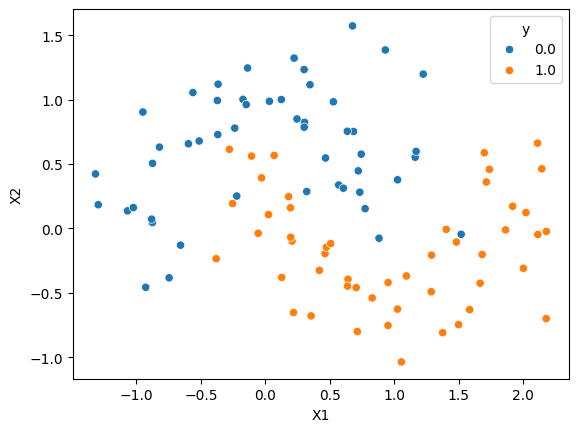

In [5]:
sns.scatterplot(x='X1',y='X2',hue='y',data=df)
plt.show()

In [6]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [33]:
# use 1 activation as relu/tanh

In [20]:
model=Sequential()
model.add(Dense(2,activation='tanh',input_dim=X.shape[1]))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
initial_weight=model.get_weights()

In [22]:
initial_weight[0]

array([[-0.78771317,  0.03090143],
       [-0.42131323, -0.8742734 ]], dtype=float32)

In [23]:
initial_weight[0]=np.zeros(model.get_weights()[0].shape)
initial_weight[1]=np.zeros(model.get_weights()[1].shape)
initial_weight[2]=np.zeros(model.get_weights()[2].shape)
initial_weight[3]=np.zeros(model.get_weights()[3].shape)

In [24]:
initial_weight

[array([[0., 0.],
        [0., 0.]]),
 array([0., 0.]),
 array([[0.],
        [0.]]),
 array([0.])]

In [25]:
model.set_weights(initial_weight)

In [26]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
history=model.fit(X,y,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.4477 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5273 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5273 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [27]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.00193869], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


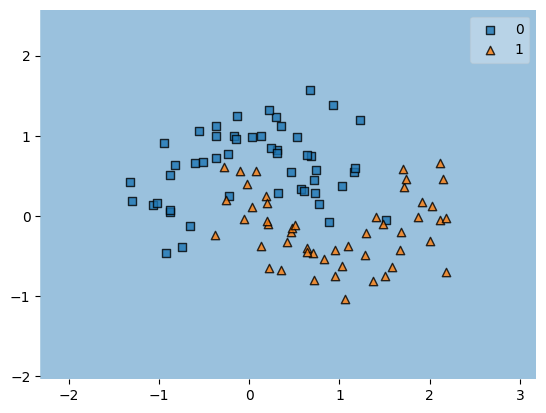

In [32]:
plot_decision_regions(X.to_numpy(),y.astype('int').to_numpy(),clf=model)
plt.show()

### Sigmoid as activation

In [39]:
model3=Sequential()

In [40]:
model3.add(Dense(10,activation='sigmoid',input_dim=X.shape[1]))
model3.add(Dense(1,activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

In [42]:
initial_weight=model3.get_weights()

In [46]:
initial_weight[0]=np.zeros(model3.get_weights()[0].shape)
initial_weight[1]=np.zeros(model3.get_weights()[1].shape)
initial_weight[2]=np.zeros(model3.get_weights()[2].shape)
initial_weight[3]=np.zeros(model3.get_weights()[3].shape)

In [47]:
model3.set_weights(initial_weight)

In [48]:
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history3=model3.fit(X,y,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.4195 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4688 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4266 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5312 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5312 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4727 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [49]:
model3.get_weights()

[array([[ 0.46160048,  0.46160048,  0.46160048,  0.46160048,  0.46160048,
          0.46160048,  0.46160048,  0.46160048,  0.46160048,  0.46160048],
        [-0.49116746, -0.49116746, -0.49116746, -0.49116746, -0.49116746,
         -0.49116746, -0.49116746, -0.49116746, -0.49116746, -0.49116746]],
       dtype=float32),
 array([-0.15584186, -0.15584186, -0.15584186, -0.15584186, -0.15584186,
        -0.15584186, -0.15584186, -0.15584186, -0.15584186, -0.15584186],
       dtype=float32),
 array([[0.06077452],
        [0.06077452],
        [0.06077452],
        [0.06077452],
        [0.06077452],
        [0.06077452],
        [0.06077452],
        [0.06077452],
        [0.06077452],
        [0.06077452]], dtype=float32),
 array([-0.0698854], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


<Axes: >

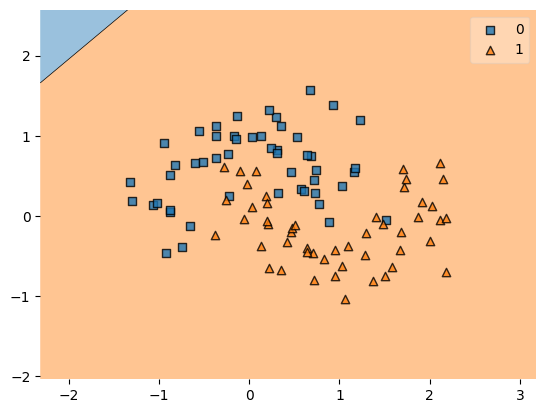

In [52]:
plot_decision_regions(X.to_numpy(),y.astype('int').to_numpy(),clf=model3)